In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import copy

In [2]:
im = cv2.imread('Sunflower.jpg')
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (int(im.shape[1]/5), int(im.shape[0]/5)))

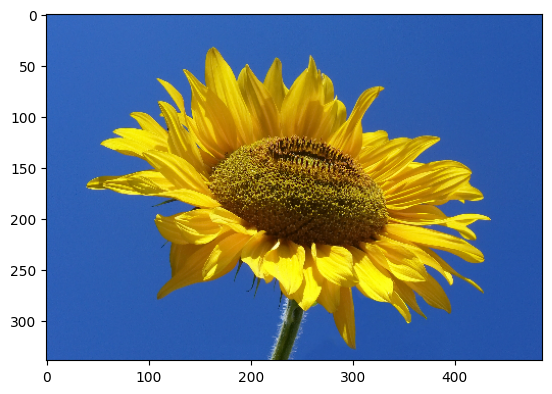

In [3]:
plt.imshow(im)

In [4]:
def zoom_at(img, zoom=1, angle=0, coord=None):
    
    cy, cx = [ i/2 for i in img.shape[:-1] ] if coord is None else coord[::-1]
    
    rot_mat = cv2.getRotationMatrix2D((cx,cy), angle, zoom)
    result = cv2.warpAffine(img, rot_mat, img.shape[1::-1], flags=cv2.INTER_LINEAR)
    
    return result

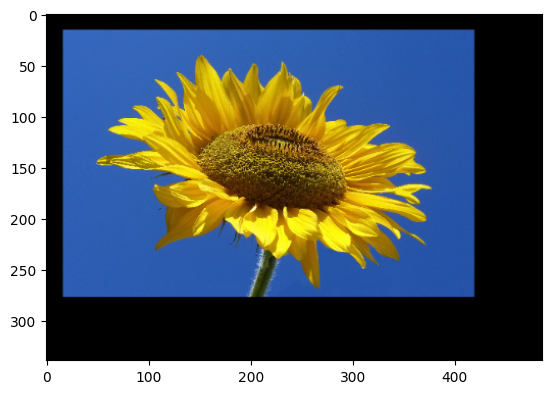

In [5]:
border_im = cv2.copyMakeBorder(im, 20, 80, 20, 80, cv2.BORDER_CONSTANT, value=[0, 0, 0])
border_im = cv2.resize(border_im, im.shape[:2][::-1])
plt.imshow(border_im)

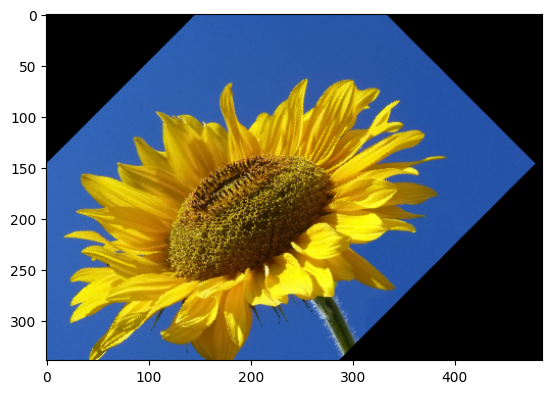

In [6]:
rot_im = zoom_at(im, zoom=1, coord = (250, 250), angle= 45)
plt.imshow(rot_im)

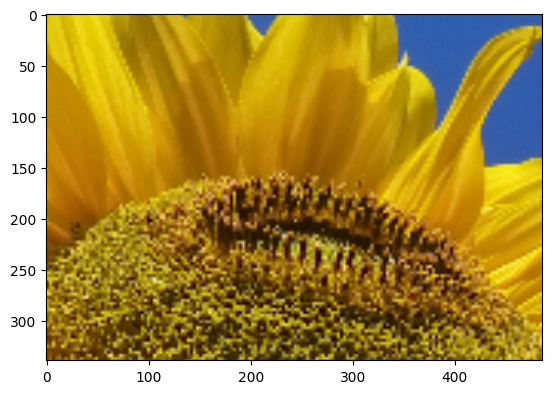

In [7]:
zoom_im = zoom_at(im, zoom=3, coord = (250, 100))
plt.imshow(zoom_im)

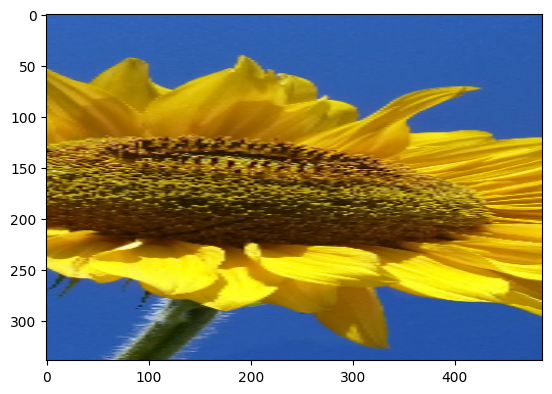

In [8]:
streetch_im = im[:: , 200:350:]
streetch_im = cv2.resize(streetch_im, im.shape[:2][::-1])
plt.imshow(streetch_im)

In [60]:
def accent_on_chanel(img, channel = 'r', power = 1):
    image = copy.deepcopy(img)
    chanel = 0 if channel == 'r' else 1 if channel == 'g' else 2

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            norm_sum = int(image[i, j][0]) + int(image[i, j][1]) + int(image[i, j][2])
            new_sum = 0
            for f in range(3):
                if f == chanel:
                    new_val = min(255, int(image[i, j][f] * np.sqrt(power)))
                else:
                    new_val = min(255, int(image[i, j][f] / np.sqrt(power)))
                image[i, j][f] = new_val
                new_sum += new_val
    return image

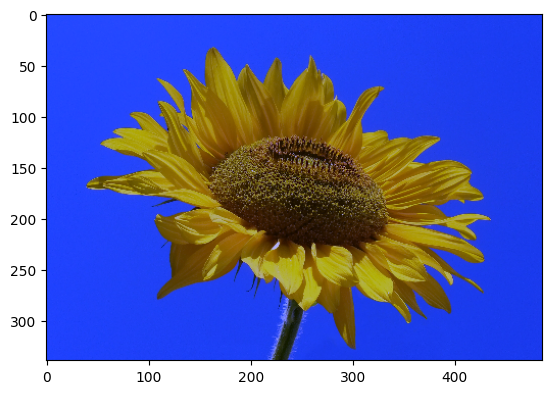

In [84]:
accented_im = accent_on_chanel(im, 'b', 2)
plt.imshow(accented_im)

In [68]:

def apply_fisheye_effect(img,
                         K= np.array( [[338.37324094,0,319.5],[0,339.059099,239.5],[0,0,1]], dtype=np.float32),
                         d = np.array([0.17149, -0.27191, 0.25787, -0.08054], dtype=np.float32)):

   indices = np.array(np.meshgrid(range(img.shape[0]), range(img.shape[1]))).T \
            .reshape(np.prod(img.shape[:2]), -1).astype(np.float32)

   Kinv = np.linalg.inv(K)
   indices1 = np.zeros_like(indices, dtype=np.float32)
   for i in range(len(indices)):
      x, y = indices[i]
      indices1[i] = (Kinv @ np.array([[x], [y], [1]])).squeeze()[:2]
   indices1 = indices1[np.newaxis, :, :]

   in_indices = cv2.fisheye.distortPoints(indices1, K, d)
   indices, in_indices = indices.squeeze(), in_indices.squeeze()

   distorted_img = np.zeros_like(img)
   for i in range(len(indices)):
      x, y = indices[i]
      ix, iy = in_indices[i]
      if (ix < img.shape[0]) and (iy < img.shape[1]):
         distorted_img[int(ix),int(iy)] = img[int(x),int(y)]

   return distorted_img

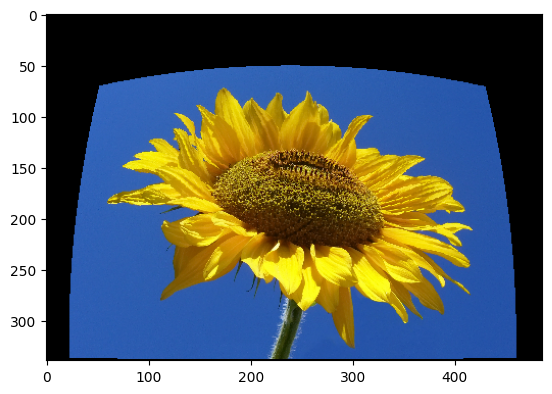

In [82]:
fe_im = apply_fisheye_effect(im)
plt.imshow(fe_im)

In [102]:
def color_filter(img, color=[255,255,0], miss = 0.1):
    image = copy.deepcopy(img)

    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            sum_2 = 0
            for f in range(3): 
                sum_2 += (int(color[f]) - int(image[i, j][f]))**2
            sum_2 = np.sqrt(sum_2)
            if sum_2 > (miss * 255 * 1.73):
                image[i, j] = [0,0,0]
    return image

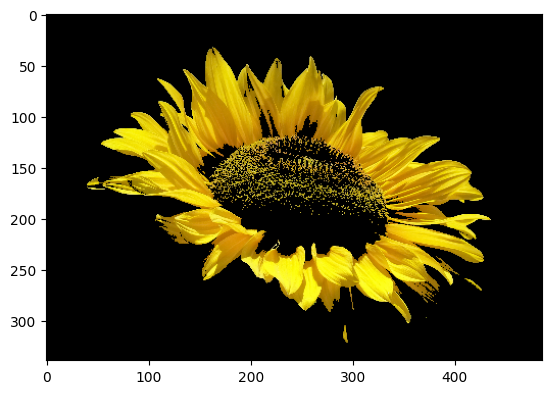

In [105]:
hap = color_filter(im,miss = 0.4)
plt.imshow(hap)